In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import files
import pandas as pd
import io


# Load the dataset
df = pd.read_csv('census-adult-data.csv', skipinitialspace=True)

# Check the 'income_class' column
print(df['income_class'].head(20))
print(df['income_class'].value_counts(dropna=False))

# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame
print(df.info())



0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
5      <=50K
6       >50K
7       >50K
8       >50K
9       >50K
10      >50K
11     <=50K
12     <=50K
13      >50K
14     <=50K
15     <=50K
16     <=50K
17     <=50K
18      >50K
19      >50K
Name: income_class, dtype: object
income_class
<=50K    24719
>50K      7841
Name: count, dtype: int64
   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ

[' <=50K' ' >50K']
income_class
<=50K    24719
>50K      7841
Name: count, dtype: int64
[0 1]
income_class
0    24719
1     7841
Name: count, dtype: int64


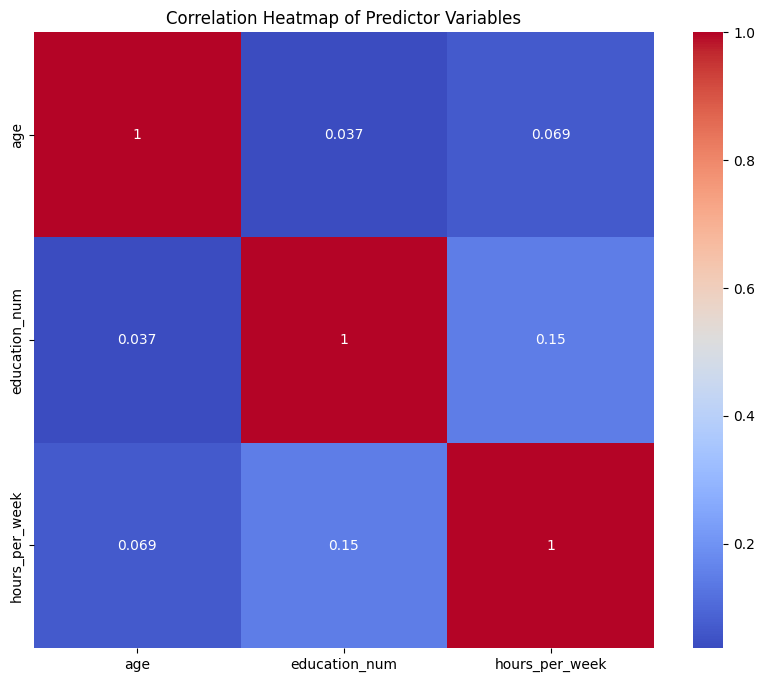

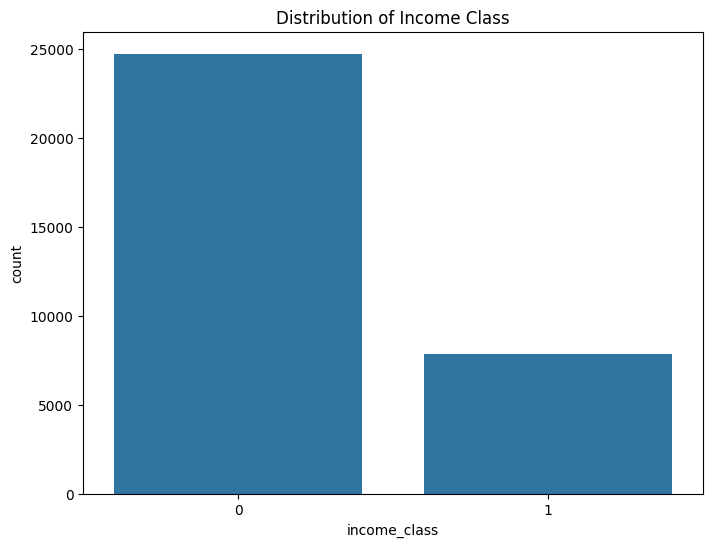

Optimization terminated successfully.
         Current function value: 0.443795
         Iterations 6
Statsmodels Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:           income_class   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26044
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.1940
Time:                        02:54:17   Log-Likelihood:                -11560.
converged:                       True   LL-Null:                       -14342.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5109      0.019    -79.752      0.000      -1.548 

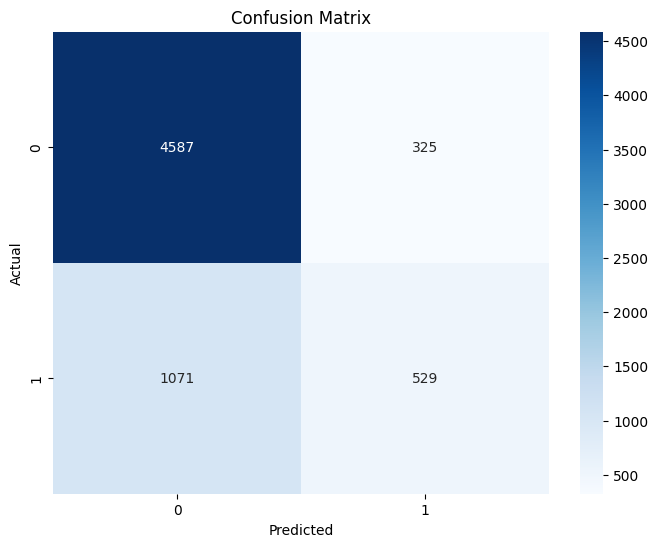

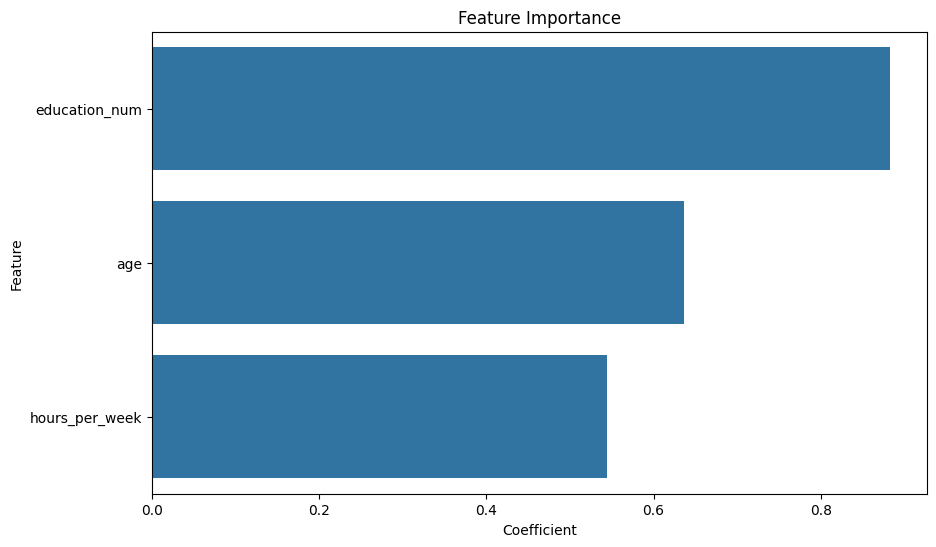

In [ ]:
print(df['income_class'].unique())
print(df['income_class'].value_counts())

# Data preprocessing
df['income_class'] = df['income_class'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Check the unique values again
print(df['income_class'].unique())
print(df['income_class'].value_counts())

# Select predictor variables
X = df[['age', 'education_num', 'hours_per_week']]
y = df['income_class']

# Visualization 1: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

# Visualization 2: Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='income_class', data=df)
plt.title('Distribution of Income Class')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Statsmodels Logistic Regression
X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.Logit(y_train, X_train_sm)
result_sm = model_sm.fit()

print("Statsmodels Logistic Regression Results:")
print(result_sm.summary())

# Sklearn Logistic Regression
model_sk = LogisticRegression()
model_sk.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model_sk.predict(X_test_scaled)

# Evaluate the model
print("\nSklearn Logistic Regression Results:")
print(classification_report(y_test, y_pred))

# Visualization 3: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_sk.coef_[0]
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


Variable Selection

The chosen variables for the logistic regression model are:

1. x1 (likely 'age')
2. x2 (likely 'education_num')
3. x3 (likely 'hours_per_week')

These variables were chosen because:

1. Age often correlates with income, as work experience typically increases with age.
2. Education level (represented by 'education_num') is generally a strong predictor of income potential.
3. Hours worked per week can directly impact income, especially for hourly workers or those eligible for overtime.

Interpretation of Results

Statsmodels Logistic Regression

1. All three variables (x1, x2, x3) are statistically significant (p < 0.001), indicating they are important predictors of income class.

2. The coefficients are all positive, meaning:
   - Increasing age (x1) is associated with higher odds of being in the >50K income class.
   - More education (x2) is associated with higher odds of being in the >50K income class.
   - Working more hours (x3) is associated with higher odds of being in the >50K income class.

3. Education (x2) has the largest coefficient (0.8830), suggesting it has the strongest impact on predicting income class.

4. The model's pseudo R-squared is 0.1940, indicating that about 19.4% of the variance in income class is explained by these variables.

Sklearn Logistic Regression

The sklearn model uses the same variables as the statsmodels version. The evaluation metrics show:

1. **Accuracy**: The overall accuracy of the model is 0.79, meaning it correctly predicts the income class for 79% of the cases.

2. **Precision**:
   - For class 0 (<=50K): 0.81
   - For class 1 (>50K): 0.62

3. **Recall**:
   - For class 0 (<=50K): 0.93
   - For class 1 (>50K): 0.33

4. **F1-score**:
   - For class 0 (<=50K): 0.87
   - For class 1 (>50K): 0.43

The model performs better at predicting the <=50K class than the >50K class. This could be due to class imbalance in the dataset, with more instances of the <=50K class.

Model Evaluation

1. The model has good overall accuracy (79%), but it's more effective at identifying individuals in the <=50K income class.

2. The precision for the >50K class (0.62) indicates that when the model predicts someone is in the >50K class, it's correct 62% of the time.

3. The recall for the >50K class (0.33) suggests that the model only identifies 33% of the actual >50K earners.

4. The F1-score, which balances precision and recall, is much higher for the <=50K class (0.87) than for the >50K class (0.43), further highlighting the model's bias towards the majority class.

In conclusion, while the model provides valuable insights, there's room for improvement, particularly in identifying high-income individuals. Addressing class imbalance and potentially incorporating additional relevant features could enhance the model's performance.
